# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

#### <span style="color:black"> Esercitazioni svolte di Alessandro Cermenati </span>

## <span style="color:blue">  Numerical exercises 1</span>

Allegate all'esercitazione ci sono 4 cartelle:

- random contiene il codice atto generare le necessarie sequenze di numeri casuali per i 3 esercizi.

- parte1, parte2, parte3 contengono i file con i dati necessari a produrre i grafici e risultati richiesti dagli esercizi.

Ogni cartella parte contiene, al suo interno, una cartella Analisys, contenente il codice necessario allo svolgimento degli esercizi ed un file di testo, prodotto da random, che contiene la sequenza di numeri pseudocasuali per lo svolgimento dell'analisi.

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

1_ Ho testato il generatore di numeri pseudocasuali generando una sequenza di numeri pseudocasuali, distribuiti uniformemente nell'intervallo [0,1]; utilizzo il file random_values.txt contenente una sequenza di 100000 numeri generati in modo pseudocasuale dal codice in random; il codice in Analisys riceve i dati di random_values.txt e produce 6 file, contenenti le stime del valor medio, della varianza, delle lore incertezze, del chi quadro e il chi quadro totale, per testare il generatore di numeri random secondo una distribuzione uniforme.

qui è riportato l'andamento del valor medio, con la sua incertezza statistica.

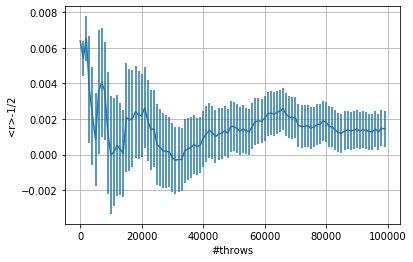

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
mean = np.loadtxt("parte1/mean.txt") # carico le stime del valore medio
x = np.arange(N)
std = np.loadtxt("parte1/stddev.txt") # carico le deviazioni standard associate alle stime dei valori medi
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,mean-0.5,yerr=std)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

2_ Qui è riportato l'andamento della varianza, con l'incertezza statistica associata.

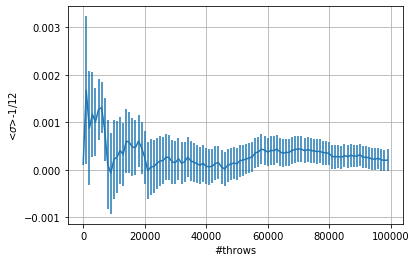

In [2]:
variance = np.loadtxt("parte1/variance.txt") # carico le stime del valore medio
stdvar = np.loadtxt("parte1/stddev_variance.txt") # carico le deviazioni standard associate alle stime dei valori medi

plt.errorbar(x,variance - 1/12,yerr=stdvar)
plt.xlabel('#throws')
plt.ylabel('<$\sigma$>-1/12')
plt.grid(True)
plt.show()

3_ Qui è riportato l'andamento del chi quadro in ogni sottointervallo di quello iniziale; il numero di sottointervalli è, in questo caso, uguale al numero di blocchi di step Montecarlo. Sotto il valore totale del chi quadro statistico, confrontabile con 100. Possiamo quindi dire, dato l'andamento del valor medio e della varianza, e dato il chi quadro totale, che il metodo utilizzato produce una seguenza di numeri pseudocasuali distribuiti in modo uniforme in (0,1).

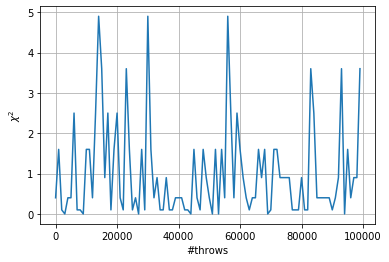

101.8


In [12]:
chi2 = np.loadtxt("parte1/chi_quadro.txt")  #carico le stime del chi quadro per ogni sottointervallo
chi2stat = np.loadtxt("parte1/results.txt")  #carico il risultato sul chi quadro

plt.plot(x, chi2)
plt.xlabel('#throws')
plt.ylabel('$\chi^2$')
plt.grid(True)
plt.show()
print(chi2stat)

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).



Ho esteso il codice in random, implementando il metodo della trasformata, per generare numeri pseudocasuali secondo le due distribuzioni assegnate:

Le sequenze di numeri pseudocasuali generati secondo le distribuzioni esponenziale e Lorentziana sono ottenuti mediante il metodo della trasformata; data una variabile r, distribuita uniformemente in [0,1], vogliamo che la variabile x(r) segua una certa distribuzione f(x).
p(r $\in$ [r, r + dr]) = p (x $\in$ [x(r), x(r) + dx(r)])

$\Rightarrow$ f(x)dx = g(r)dr    (con g(r) pdf della variabile r, g(r) = 1)

$\Rightarrow$ F(x) = G(r)        passando alle CDF

$\Rightarrow$ F(x) = $\int_{-\infty}^{x(r)} f(x^{'})dx^{'} = \int_{-\infty}^{r} g(r^{'})dr^{'} = r$

calcolando l'integrale e invertendo la relazione si puù costruire una qualsiasi distribuzione a partire da una variabile distribuita uniformemente in [0,1].

x(r) = $- \frac{ln(r)}{\lambda}$ segue una distribuzione esponenziale di media $\lambda$.

y(r) = $\frac{1}{2} + \frac{arctan(\frac{x(r) - \mu}{\Gamma})}{\pi}$ segue una distribuzione Lorentziana di media $\mu$ e larghezza $\Gamma$

In parte2/Analisys c'è il codice che, ricevendo i 3 file (unif_dice.txt, exp_dice.txt, Lor_dice.txt) contenenti $10^{6}$ "lanci" del dado secondo le 3 distribuzioni assegnate, ne calcola $10^{4}$ medie per i 4 valori di N assegnati, e produce 4 file di output, indicizzati dal valore di N, contenente i risultati da mettere in istogramma.

Ho rilanciato il programma per ognuna delle 3 distribuzioni assegnate.


Qui produco gli istogrammi relativi ai valori medi, per i diversi numeri di blocchi utilizzati per il calcolo, per un dado uniforme.

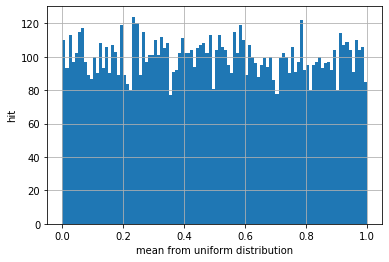

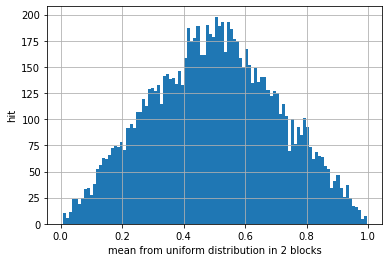

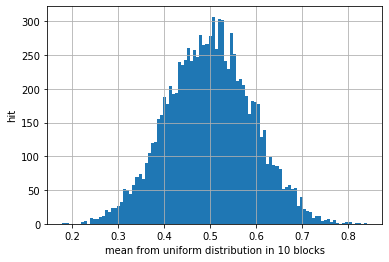

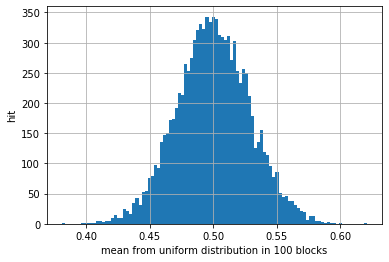

In [4]:
unif1 = np.loadtxt("parte2/uniform_1.txt")
unif2 = np.loadtxt("parte2/uniform_2.txt")
unif10 = np.loadtxt("parte2/uniform_10.txt")
unif100 = np.loadtxt("parte2/uniform_100.txt")

plt.hist(unif1, bins=100)
plt.xlabel('mean from uniform distribution')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(unif2, bins=100)
plt.xlabel('mean from uniform distribution in 2 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(unif10, bins=100)
plt.xlabel('mean from uniform distribution in 10 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(unif100, bins=100)
plt.xlabel('mean from uniform distribution in 100 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

Qui produco gli istogrammi relativi ai valori medi, per i diversi numeri di blocchi utilizzati per il calcolo, per un dado esponenziale.

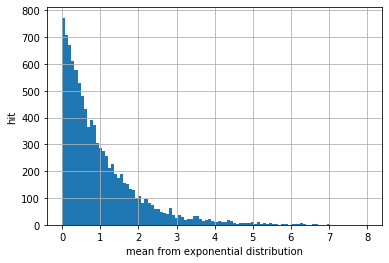

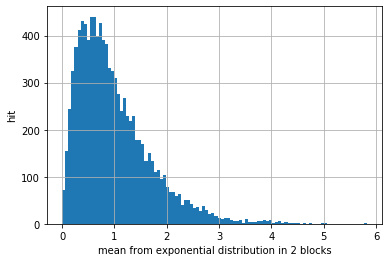

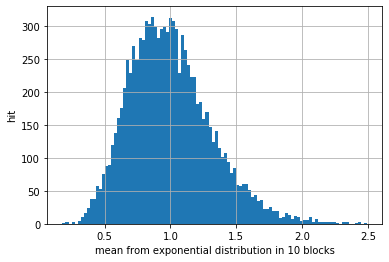

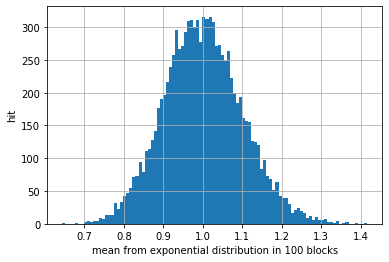

In [5]:
exp1 = np.loadtxt("parte2/exponential_1.txt")
exp2 = np.loadtxt("parte2/exponential_2.txt")
exp10 = np.loadtxt("parte2/exponential_10.txt")
exp100 = np.loadtxt("parte2/exponential_100.txt")

plt.hist(exp1, bins=100)
plt.xlabel('mean from exponential distribution')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(exp2, bins=100)
plt.xlabel('mean from exponential distribution in 2 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(exp10, bins=100)
plt.xlabel('mean from exponential distribution in 10 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(exp100, bins=100)
plt.xlabel('mean from exponential distribution in 100 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

Qui produco gli istogrammi relativi ai valori medi, per i diversi numeri di blocchi utilizzati per il calcolo, per un dado Lorentziano.

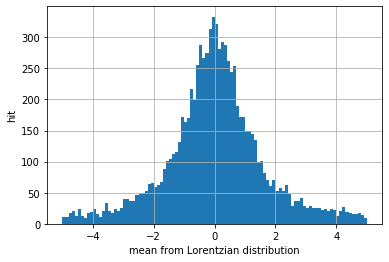

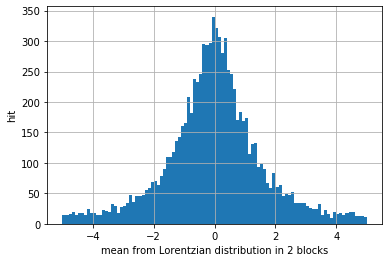

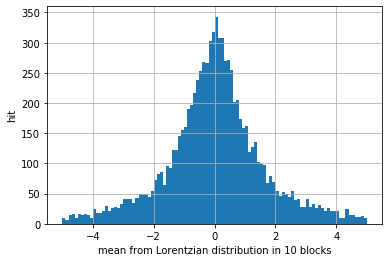

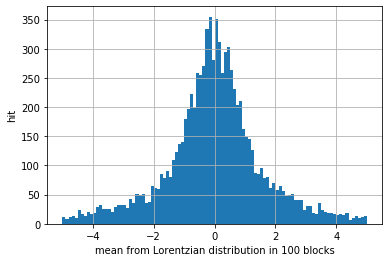

In [6]:
lor1 = np.loadtxt("parte2/Lorentzian_1.txt")
lor2 = np.loadtxt("parte2/Lorentzian_2.txt")
lor10 = np.loadtxt("parte2/Lorentzian_10.txt")
lor100 = np.loadtxt("parte2/Lorentzian_100.txt")

plt.hist(lor1, bins=100, range=(-5. , 5.))
plt.xlabel('mean from Lorentzian distribution')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(lor2, bins=100, range=(-5. , 5.))
plt.xlabel('mean from Lorentzian distribution in 2 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(lor10, bins=100, range=(-5. , 5.))
plt.xlabel('mean from Lorentzian distribution in 10 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

plt.hist(lor100, bins=100, range=(-5. , 5.))
plt.xlabel('mean from Lorentzian distribution in 100 blocks')
plt.ylabel('hit')
plt.grid(True)
plt.show()

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

Per prima cosa ho esteso il codice in random (non i metodi random in sè, solo il codice main), per produrre una coppia di numeri pseudocasuali:

- Il primo dei due è distribuito in modo uniforme fra 0 e 1, e rappresenta la coordinata x del centro dell'ago: utilizzando d=1, il centro dell'ago "lanciato" può così cadere, con distribuzione uniforme, in uno qualsiasi dei punti compresi tra due linee della griglia. Il valore di L dovrà quindi essere minore di 1 (fissato poi a 0.8).

- il secondo dei due rappresenta l'inclinazione, rispetto all'orizzontale, dell'ago (le linee della griglia sono verticali). Per rappresentare adeguatamente tutte le inclinazioni che può avere l'ago, è necessario un angolo nell'intervallo ($-\frac{\pi}{2},\frac{\pi}{2}$), per la simmetria del problema. Per ottenere quindi una variabile distribuita in modo uniforme in tale intervallo, senza usare il valore reale di $\pi$, genero una coppia di punti (x,y) nel piano e ne calcolo l'arcotangente del rapporto incrementale.

Qui riporto, in un istogramma, la distribuzione dei valori generati per l'inclinazione dell'ago, per mostrare che essi seguono una distribuzione uniforme nell'intervallo richiesto.

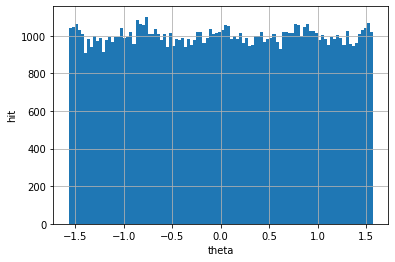

In [14]:
Xc, theta = np.loadtxt("parte3/Analisys/Buffon.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.hist(theta, bins=100, range=(-math.pi/2 ,math.pi/2 ))
plt.xlabel('theta')
plt.ylabel('hit')
plt.grid(True)
plt.show()

Qui espongo la differenza fra il valore stimato e reale di $\pi$ in funzione del numero di blocchi, con incertezza statistica associata. Si può vedere che la differenza converge bene a 0.

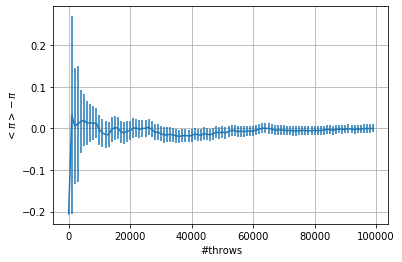

In [15]:
mean_pi = np.loadtxt("parte3/mean_pi.txt")
sigma_pi = np.loadtxt("parte3/sigma_pi.txt")

plt.errorbar(x,mean_pi - math.pi,yerr=sigma_pi)
plt.xlabel('#throws')
plt.ylabel('$<\pi> - \pi$')
plt.grid(True)
plt.show()